# Introduction to Baysian Inference part 1
<div style="text-align:right;">23th Mar Hiroshi Urata</div>
  
  <br>
  <br>
Table of Contents  
1. Fundamentals of Probability
    1. Basic notation
    1. Sum rule and Product rule
    2. Probability mass function
    3. Probability density function
2. Maximum Likelihood Estimation
    
3. Bayesian Inference

4. Reference

5. Contact

In [9]:
import numpy as np
from scipy.stats import bernoulli
from scipy.stats import  beta
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Fundamentals of Probability  
### 1-1. Basic notation
Let $x$ and $y$ are probability variables,
- $p(x,y)$ : <u>Joint probability </u>
which is verbalized as 'the probability $x$ and $y$'.
- $p(x|y)$ : <u>Conditional probability</u> which is verbalized as 'the probability of $x$ given $y$'.  
  
<br>
Example :
<div style="float:right;"><img src="Box_fruits.png"　width="300px"></img></div>

There are two variables :  
    x : color of box (b corresponding blue, or g corresponding green)  
    y : fruit (o corresponding orange, or a corresponding apple)

<!-- There are two coloured boxes each containing fruits. Apple is shown in red and orange is  coloured 
in orange. Let's say the identity of the box that will be chosen is a random variable $x$, this random   
variable can take one of the two possible values, namely b (corresponding to the blue box) or g 
(corresponding to the green box). -->


Given that we have chosen blue box, what is the probability that we chose apple. We can apply conditional probability.

$$p(y=a|x=b) = \frac{2}{3}$$

Let's say the probability of selecting blue box is 4/10, like $p(x=b) = 4/10$ let alone   $p(x=a) = 6/10$.  
Then, "What is the overall probability that we will pick apple?"
  

### 1-2. Sum rule and Product rule  
There are two important rule of probability.
  
&emsp;&emsp;<u>Sum rule</u> : $p(x) = \sum_y p(x,y)$  
&emsp;&emsp;<u>Product rule</u> : $p(x,y) = p(x|y)p(y)$
  
"What is the overall probability that we will pick apple?"  
    → Apply sum rule and product rule  
    
$$\begin{eqnarray}p(y=a) &=& \sum_x p(y=a,x) \\
&=& p(y=a,x=b) + p(y=a,x=g) \\
&=& p(y=a||x=b)p(x=b) + p(y=a|x=g)p(x=g)\\
&=& \frac{2}{3} \frac{4}{10} + \frac{1}{2}  \frac{6}{10} \\
&=& \frac{17}{30} \end{eqnarray}$$

### 1-3. Probability mass function  
When it comes to probability distribution, If the probability variable is discreate, we call it probabiltiy mass function. The following is example.   
- Bernoulli distribution
  
$$ Ber(x|\mu) = \mu^{x}(1-\mu)^{1- x}$$


### 1-4. Probability density function
Probability funciton with continuous probability variable.  
- Beta distribution  
  
$$Beta(\mu|a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}$$

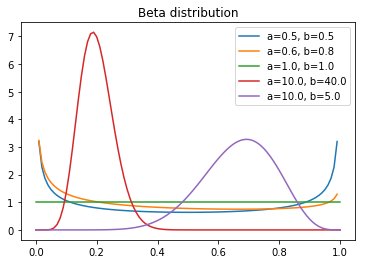

In [6]:
x = np.linspace(0,1,101)

a_list  = [0.5, 0.6, 1.0, 10.0, 10.0]
b_list = [0.5, 0.8, 1.0, 40.0, 5.0]

for a, b in zip(a_list, b_list):
    y = beta.pdf(x,a=a,b=b)
    
    plt.plot(x,y,label='a={}, b={}'.format(a,b))
    plt.legend()
    
plt.title('Beta distribution')
plt.show()

- Gaussian distribution
$$p(x|u,\sigma) = \frac{1}{\sqrt{2\pi \sigma}}exp\left\{-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}\right\}$$

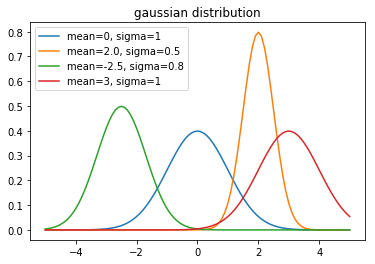

In [12]:
# plot gaussian distribution
x = np.linspace(-5,5,101)

mu_list  = [0, 2.0, -2.5, 3]
sigma_list = [1, 0.5, 0.8, 1]

for mu, sigma in zip(mu_list, sigma_list):
    y = norm.pdf(x,loc=mu,scale=sigma)
    
    plt.plot(x,y,label='mean={}, sigma={}'.format(mu,sigma))
    plt.legend()
    
plt.title('gaussian distribution')
plt.show()

### 1-5. Properties of probability distribution
- p(x) >= 0
  <br>
- $\int p(x) dx = 1$
<br>
- Expectation  
Expectation of $f(x)$ with probability distribution $p(x)$ is expressed as below.  
  
$$<f(x)>_{p(x)} = \int f(x) p(x) dx$$

- Mean
Mean  of probability distribution is 
$$<x>_{p(x)} = \int xp(x)dx$$

    - Example of mean  
        Beta distribution :   
        ~ Demo ~

## 2. Maximum Likelihood Estimation
As an example, we're gonna create a model which tells Osaka naomi will win or not.  
Let's say her winning follows *bernoulli distribution* as following,
  
$$Bern(x|\mu) = p(x|\mu) = \mu^{x}(1-\mu)^{1-x}$$
  
Now we have observations $X=\{x_1, x_2, \cdots, x_{20}\} $. 

In [8]:
# Result of Osaka naomi's game in 2019
# '1' means win, '0' means lose.
obs = np.array([1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1])

Since we set assumption of independency towards observations, joint distribution would be, 

$$ p(X|\mu) = \prod_{n=1}^{20}p(x_n|\mu) = \prod_{n=1}^{20}\mu^{x_n}(1-\mu)^{1-x_n}$$

This is the likelihood function with respect to $\mu$. We will find the value of $\mu$ which maximize likelihood function equivalently by maximizing the log likelihood function.

  
<div style="text-align:center">~ Demo ~</div>
  
We can obtain the following as a maximum likelihood estimator.  
  
$$\mu_{ML} = \frac{1}{N}\sum_{n=1}^{20}x_n$$

In [6]:
def mle_estimator(obs):
    """
    Compute maximum likelihood estimator of 
    Bernoulli distribution.
    """
    return obs.sum() / obs.shape[0]

In this case, we obtain 0.9 as a value of $\mu$ which  maximize likelihood function.

In [10]:
mu_mle = mle_estimator(obs)
print('The value of mu obtained by maximum likelihood estimator is  ',mu_mle)

The value of mu obtained by maximum likelihood estimator is   0.9


As a result, our model would be,   
$$ p(x_*|0.9) = 0.9^{x_*}0.1^{1-x_*}$$  
Now Let's say we observed　only the result of Australian Open. 


In [37]:
# Result of Osaka naomi's game in Australian Open
# '1' means win, '0' means lose.
obs_aus = np.array([1,1,1,1,1,1])

Then we can comute the value of $\mu$ with Maximum likelihood estimation.

In [16]:
mu_mle_aus = mle_estimator(obs_aus)
print('The value of mu obtained by maximum likelihood estimator is  ',mu_mle_aus)

The value of mu obtained by maximum likelihood estimator is   1.0


Our model says, Osaka Naomi will never ever lose in tennis match.... Is it feasible??  
We can call it <b>*"Overfitting"*</b>.

## 3. Bayesian Inference

In Baysian Inference, we put *"prior distribution"* to parameter. In this case, we can apply *"Beta distribution"* as prior distribution.

$$Beta(\mu|a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}$$
  
Tentatively, we set $a=10, b=5$, since we know Osaka Naomi is really competitive :) Prior distribution looks like as following.

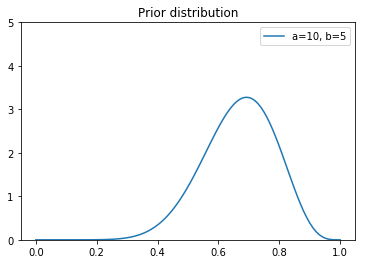

In [38]:
x = np.linspace(0,1,101)

a = 10
b = 5

y = beta.pdf(x,a=a,b=b)
    
plt.plot(x,y,label='a={}, b={}'.format(a,b))
plt.legend()
plt.title('Prior distribution')

plt.ylim(0,5)
    
plt.show()

Now we can compute posterior distribution of $\mu$,  
  
$$\begin{eqnarray}p(\mu|X) &=& \frac{\prod_{n=1}^{10}p(x_n|\mu)p(\mu)}{p(X)} \\ 
&\propto& \prod_{n=1}^{10}p(x_n|\mu)p(\mu)\end{eqnarray}$$
  
As a result, we can obtain,

$$p(\mu|X) = Beta(\mu|\hat{a}, \hat{b})$$
  
$$\hat{a} = \Sigma_{n=1}^{N}x_n +  a$$
  
$$\hat{b} = b + N - \Sigma_{n=1}^{N}x_n$$

In [14]:
def pos(a,b,obs):
    """
    Compute parameter of posterior distribution
    """
    return obs.sum() + a, b+obs.shape[0] - obs.sum()

We can compute posterior distribution with observation and parameter of prior distribution.

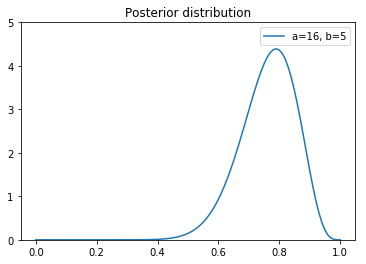

In [39]:
a_hat, b_hat = pos(a,b,obs_aus)

x = np.linspace(0,1,101)

y = beta.pdf(x,a=a_hat,b=b_hat)
    
plt.plot(x,y,label='a={}, b={}'.format(a_hat,b_hat))
plt.ylim(0,5)
plt.legend()
plt.title('Posterior distribution')
    
plt.show()

Then we can build prediction model.　In Bayesian inference, we can compute prediction by taking expectation of likelihood function by posterior distribution as following.

$$p(x_*|D) = \int p(x_*|\mu)p(\mu|D)d\mu$$
  
In this case, prediction would be 
$$p(x_*|X) = Bern(x_* | \frac{\Sigma_{n=1}^{N} x_n + a}{N + a + b})$$

In [21]:
def prediction(a,b, obs):
    """
    Compute parameter for prediction
    """
    return (obs.sum() + a) / (obs.shape[0] +a + b)

As a result, prediction looks like this ! Even though all our observation is only 1(win), we have still probability for 0 (lose).

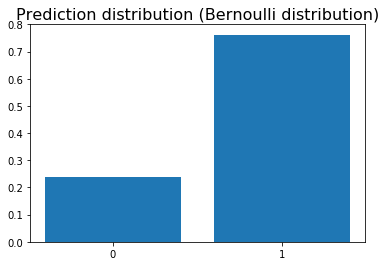

In [40]:
mu_predict = prediction(a=a, b=b, obs=obs_aus)

plt.bar([0,1],[1- mu_predict, mu_predict])
plt.title('Prediction distribution (Bernoulli distribution)',fontsize=16)
plt.xticks([0,1],[0,1])
plt.show()

## 4. Reference

&emsp;&emsp;&emsp;&emsp;・<a href="https://www.microsoft.com/en-us/research/people/cmbishop/#!prml-book">Pattern Recognition and Machine Learning  Christopher Bishop</a>

## 5. Contact  

- E-mail : keijiu1231★gmail.com
    (Replace ★ with @)
- Blog : https://hiroshiu.blogspot.com/
- twitter : https://twitter.com/hiroshiu12